# <center>Recherche Opérationnelle<br /> Workshop</center>

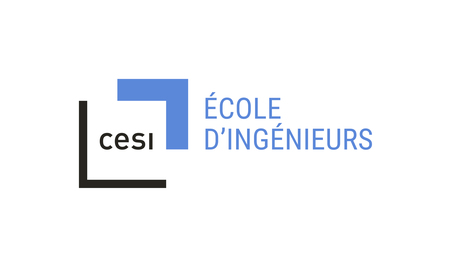


Ce Workshop aborde l'une des méthodes de résolution les plus utilisées dans la Recherche Opérationnelle, la Programmation Linéaire. Nous allons nous concentrer sur la modélisation par programmation linéaire, ses différentes variantes, et différentes méthodes de résolutions avec leurs limites.

Vous aurez un certain nombre d'équations à écrire.

**Rappel**&nbsp;: vous pouvez insérer dans une cellule Markdown des [équations au format $\mathrm{\LaTeX}$](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/) en les plaçant entre \\$. Par exemple, le code<br />
```latex
$$\sum_{i=1}^n n$$
 ```
 
produira l'expression mathématique<br />
$$\sum_{i=1}^n n$$


# 1. Programme linéaire en nombre réels à 2 dimensions
Une multinationale de bonbons pour les enfants dispose de 2 arômes de base pour la fabrication de ses produits. La saveur de chaque bonbon dépend de la quantité de chaque arôme.<br />
Le premier ingrédient coûte à l'entreprise 10€/kg et le deuxième 20€/kg. Le coût de fabrication d'un kilo de produit (somme du mélange de 2 ingrédients) est de 5€. Les études de gôut auprès des consommateurs a montré que la composition du mélange ne doit pas être supérieure à 50% du premier ingrédient et 80% du deuxième.<br />
Par ailleurs, le mois dernier, l'entreprise a vendu 100 Kg à 50€/kg. L'entreprise ne souhaite pas produire plus que ce qu'elle arrive à vendre. Combien de kilos de bonbons doit-elle fabriquer par mois et les proportions de chaque ingrédient pour maximiser les bénéfices&nbsp;?

## 1.1 Modélisation du problème

Commençons par modéliser le problème sous la forme d'un programme linéaire.<br />

### Variables de décision du programme
Identifiez les inconnues qui sont à déterminer dans le problème. On les nommera avec des variables $X_1$, $X_2$,…

<em>Les variables de décision sont :

X1	=quantiteˊ (en kg) du premier ingreˊdient utiliseˊe par mois,

X2	=quantiteˊ (en kg) du deuxieˋme ingreˊdient utiliseˊe par mois.




Ce sont donc les inconnues à déterminer pour maximiser le bénéfice total.</em>


### Contraintes du programme
Quelles contraintes identifiez-vous dans le texte&nbsp;?

<em>Limite de production :
L’entreprise ne souhaite pas produire plus que ce qu’elle vend, soit 100 kg au maximum 
X1​+X2​≤100
Proportion maximale du premier ingrédient (≤ 50 %) : 
$$
X_1 + \frac{X_2}{X_1} \le 0.5 \Rightarrow X_1 \le X_2
$$

Proportion maximale du deuxième ingrédient (≤ 80 %) :
$$
X_1 + \frac{X_2}{X_2} \le 0.8 \Rightarrow X_2 \le 4X_1
$$

Non-négativité :  </em>
X1​≥0,X2​≥0
Modélisez toutes ces contraintes sous formes d'inéquations sur une ou plusieurs variables de notre problème.

<em>$$
\begin{cases}
X_1 + X_2 \le 100, \\
X_1 \le X_2, \\
X_2 \le 4X_1, \\
X_1 \ge 0, \\
X_2 \ge 0.
\end{cases}
$$
</em>


###  Fonction économique
Exprimez la fonction économique du problème.

<em>$$
\begin{aligned}
Z &= 50(X_1 + X_2) - (10X_1 + 20X_2 + 5(X_1 + X_2)) \\
  &= (50 - 5)(X_1 + X_2) - 10X_1 - 20X_2 \\
  &= 45(X_1 + X_2) - 10X_1 - 20X_2 \\
  &= 35X_1 + 25X_2.
\end{aligned}
$$
</em>


###  1.1.4 Programme linéaire complet
Réunissez les réponses du dessus pour exprimer le programme linéaire complet optimisant la composition des bonbons de l'usine. Vous pouvez compléter la formule $\mathrm{\LaTeX}$ ci-dessous ($\text{s.c.}$ veut dire _sous contraintes_)&nbsp;:

$\begin{array}{rl@{}ll}
\text{Minimiser/Maximiser}  & … &\\
\text{s.c.}& … & \leq…\\
          & … & \geq …\\
          & …
\end{array}$

<em>$$
\begin{array}{rl}
\text{Maximiser} & Z = 35X_1 + 25X_2 \\[6pt]
\text{s.c.} & X_1 + X_2 \le 100 \\[4pt]
            & X_1 - X_2 \le 0 \\[4pt]
            & X_2 - 4X_1 \le 0 \\[4pt]
            & X_1 \ge 0,\; X_2 \ge 0
\end{array}
$$
</em>


## 1.2 Résolution par la méthode graphique

Pour comprendre le comportement de ce genre de système, on va regarder comment il se comporte graphiquement. Chaque variable sera représentée sur un axe du graphique. Ici, le problème a deux variables, il sera représenté sur un plan. Nous allons prendre la convention suivante&nbsp;: $X_1$ sera représenté sur l'axe des abscisses et $X_2$ sera représenté sur l'axe des ordonnées.


Nous allons représenter sur ce plain les inéquations de contraintes et la fonction économique. Pour cela, nous utiliserons [matplotlib](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html).

### Représentation des contraintes
Commençons par placer les différentes contraintes

Déjà, comment tracer une droite en Python&nbsp;? C'est très simple avec [la fonction `plot`](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/3.1.0/tutorials/), surtout si on utilise [NumPy](https://www.courspython.com/apprendre-numpy.html) pour manipuler des [intervalles de valeurs linéaires](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Il suffit d'utiliser la fonction [`fill_between`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_between.html).


Avant de l'utiliser pour afficher notre programme linéaire, testons ça sur un petit exemple. Mettons qu'on veuille représenter l'inéquation $2x + y \leq 4$



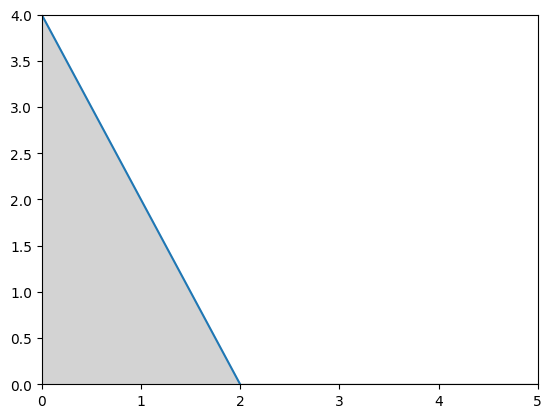

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xmax = 5
x = np.linspace(0, xmax) # on genere l'intervalle des x
y = 4 - 2*x # on genere l'intervalle des y

ymax = np.amax(y)

plt.plot(x, y)
plt.fill_between(x, y, color='lightgrey')

# on dessine entre 0,0 et les extremas des fonctions
plt.xlim(0, xmax)
plt.ylim(0, ymax)

# on affiche
plt.show()

Si on doit tracer une inégalité du type $y\leq\dots$, il suffit de spécifier une valeur pour le paramètre `y2` de la fonction `fill_between`. La valeur de `ymax` permettra de couvrir tout le graphique.

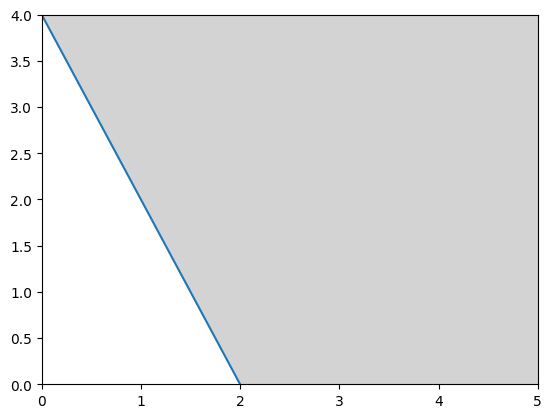

In [2]:
ymax = np.amax(y)

plt.plot(x, y)
plt.fill_between(x, y, ymax, color='lightgrey')

# on dessine entre 0,0 et les extremas de la fonction
plt.xlim(0, xmax)
plt.ylim(0, ymax)

# on affiche
plt.show()

On a donc tout ce qu'il nous faut pour afficher les inéquations de nos contraintes. Traçons les droites en rouge, et les zones d'inégalités en gris.



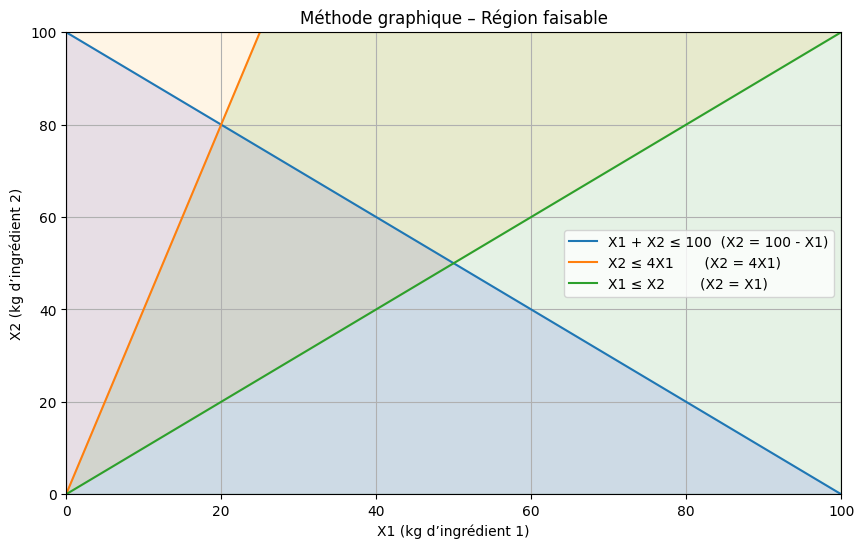

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Domaine des X1
xmax = 100
x = np.arange(0, xmax + 1)  # X1 (kg)

# --- Contraintes (sous forme y = f(x), avec y ≡ X2) ---

# 1) X1 + X2 ≤ 100  ->  X2 ≤ 100 - X1
y1 = 100 - x

# 2) X2 ≤ 4X1       ->  X2 = 4X1
y2 = 4 * x

# 3) X1 ≤ X2        ->  X2 = X1
y3 = x

# --- Bornes pour l'affichage ---
ymax = np.max(y1)  # ici 100

# --- Tracé du graphe ---
plt.figure(figsize=(10, 6))

# Frontières des contraintes
plt.plot(x, y1, label="X1 + X2 ≤ 100  (X2 = 100 - X1)")
plt.plot(x, y2, label="X2 ≤ 4X1       (X2 = 4X1)")
plt.plot(x, y3, label="X1 ≤ X2        (X2 = X1)")

# --- Zones d'inégalités (remplissages) ---
# Zone 1: X2 ≤ 100 - X1  -> sous la courbe y1
plt.fill_between(x, 0, y1, color='blue', alpha=0.1)

# Zone 2: X2 ≤ 4X1      -> sous la courbe y2
plt.fill_between(x, 0, y2, color='green', alpha=0.1)

# Zone 3: X2 ≥ X1       -> au-dessus de la droite y3
plt.fill_between(x, y3, ymax, color='orange', alpha=0.1)

# --- Mise en forme ---
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.xlabel("X1 (kg d’ingrédient 1)")
plt.ylabel("X2 (kg d’ingrédient 2)")
plt.title("Méthode graphique – Région faisable")
plt.legend()
plt.grid(True)

plt.show()


Que représente la partie apparaissant en blanc&nbsp;? Quelle est sa caractéristique mathématique&nbsp;?

<em>La partie en blanc représente la zone des solutions réalisables (ou ensemble des solutions admissibles) du problème.</em>


### Représentation de la fonction économique

Nous allons pouvoir utiliser cette propriété pour définir la solution optimale. Il nous faut donc maintenant représenter la fonction économique. Sa forme générale est $ax +by = p$. Cette fonction est la famille des droites correspondant à l’ensemble–solution avec une pente $\dfrac{-a}{b}$. Dans notre cas, que vaut cette pente&nbsp;?

<em>La forme générale est 
ax+by=p
ax+by=p. La pente vaut 
−ab
−
b
a
	​

.

Ici 
a=35,  b=25
a=35,b=25 (fonction économique 
35X1+25X2=p
35X
1
	​

+25X
2
	​

=p).
Calcul pas à pas : 
3525=75=1.4
25
35
	​

=
5
7
	​

=1.4.
Donc la pente est 
−1.4
−1.4
	​

.</em>






.



Le but est de trouver la fonction linéaire de $p$ qui maximise la fonction économique tout en restant dans l'espace des solutions admissibles. Quelle est la forme générale de cette fonction&nbsp;? Quelle valeur devons-nous donc déterminer&nbsp;?

<em>### 2) Forme générale et ce qu’il faut trouver

On peut écrire la famille de droites de niveau sous la forme :

$$
35X_1 + 25X_2 = p 
\;\;\Longleftrightarrow\;\;
X_2 = -\frac{35}{25}X_1 + \frac{p}{25}
= -1.4\,X_1 + \frac{p}{25}.
$$

Ce qu’on doit déterminer : la **valeur maximale de** \( p \) telle que la droite  
\( 35X_1 + 25X_2 = p \) intersecte encore la région faisable.

Autrement dit, on cherche :

$$
p_{\max} = \max_{(X_1, X_2) \in F} \big( 35X_1 + 25X_2 \big),
$$

puis les \( (X_1, X_2) \) qui réalisent ce maximum.

Pratique courante : pour un **PL à deux variables**, on parcourt les sommets de la région faisable,  
on calcule \( Z = 35X_1 + 25X_2 \) en chacun, et on garde le plus grand.

Ici, on obtient :

$$
p_{\max} = 3000 \quad \text{en} \quad (X_1, X_2) = (50, 50).
$$
</em>

Un [Widget](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html) intégré [automatiquement](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) à notre fonction de calcul nous permettra de faire varier facilement ce paramètre et de déterminer les valeurs admissibles de $X_1$ et $X_2$ maximisant la fonction économique. Le code vous est fourni, il ne vous reste plus qu'à implémenter le calcul et l'affichage de la fonction économique tenant compte de cette valeur réelle&nbsp;!


Une fois que vous avez localisé globalement la position de la solution, vous pouvez modifier l'intervalle `x` pour zoomer sur cette partie et obtenir un résultat plus précis.

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

def trace(n):
    xmax = 60
    ymax = 100
    x = np.arange(0, xmax)
    
    # Fonction économique : 35x1 + 25x2 = n
    a = 35
    b = 25
    pente = -a / b
    yeco = pente * x + n / b   # équation de la droite

    plt.figure()
    plt.plot(x, yeco, color='red', linewidth=2, label=f'35X₁ + 25X₂ = {n:.0f}')
    
    plt.ylim(0, ymax)
    plt.xlim(0, xmax)
    plt.xlabel('X₁ (kg)')
    plt.ylabel('X₂ (kg)')
    plt.title('Représentation de la fonction économique')
    plt.legend()
    plt.grid(True)
    plt.gcf().set_size_inches(18, 10)
    plt.show()

# slider : fait varier n (la valeur de la fonction économique)
interact(trace, n=widgets.FloatSlider(min=-200.0, max=4000.0, step=50, value=1000.0))


interactive(children=(FloatSlider(value=1000.0, description='n', max=4000.0, min=-200.0, step=50.0), Output())…

<function __main__.trace(n)>

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

def trace(n):
    xmax = 60
    ymax = 100
    x = np.arange(0, xmax)
    
    # Fonction économique : 35x1 + 25x2 = n
    a = 35
    b = 25
    pente = -a / b
    yeco = pente * x + n / b   # équation de la droite

    plt.figure()
    plt.plot(x, yeco, color='red', linewidth=2, label=f'35X₁ + 25X₂ = {n:.0f}')
    
    plt.ylim(0, ymax)
    plt.xlim(0, xmax)
    plt.xlabel('X₁ (kg)')
    plt.ylabel('X₂ (kg)')
    plt.title('Représentation de la fonction économique')
    plt.legend()
    plt.grid(True)
    plt.gcf().set_size_inches(18, 10)
    plt.show()

# slider : fait varier n (la valeur de la fonction économique)
interact(trace, n=widgets.FloatSlider(min=-200.0, max=4000.0, step=50, value=1000.0))


interactive(children=(FloatSlider(value=1000.0, description='n', max=4000.0, min=-200.0, step=50.0), Output())…

<function __main__.trace(n)>

### Résolution
Utilisez le slider pour déplacer la droite sur le polygone. Que peut-on en déduire sur les valeurs de $X_1$ et $X_2$&nbsp;? Que vaut la fonction économique&nbsp;?

### 🔹 Déduction sur les valeurs de \( X_1 \) et \( X_2 \)

En déplaçant la droite (grâce au *slider*), on constate que la valeur optimale de la fonction économique est atteinte **au point d’intersection entre deux contraintes** dans la zone faisable.

Dans notre cas, la droite de profit maximal touche le polygone faisable au point :

$$
(X_1, X_2) = (20, 80)
$$

C’est **le point optimal.**

---

### 🔹 Valeur de la fonction économique

$$
\begin{aligned}
Z &= 35X_1 + 25X_2 \\
  &= 35(20) + 25(80) \\
  &= 700 + 2000 \\
  &= 2700
\end{aligned}
$$

---

### 🔹 Interprétation

L’entreprise doit donc produire **20 kg du premier ingrédient** et **80 kg du second**  
pour maximiser son bénéfice.

Le bénéfice maximum atteint est :

$$
Z_{\max} = 2700 \text{ €}
$$

---

### 🔹 Propriété générale

Dans un problème linéaire en nombres réels, **la solution optimale se trouve toujours sur un sommet du polygone des contraintes** (appelé *ensemble faisable*).

Autrement dit :

$$
\text{👉 La solution optimale d’un programme linéaire se situe à l’intersection de deux (ou plusieurs) contraintes actives.}
$$



# 2. Programme linéaire en nombre réels à $n$ dimensions

Arcelor-Mittal, géant mondial de l'acier, a ouvert une nouvelle usine en Grèce. Il fabrique 9 alliages à base de 3 matières premières&nbsp;: le plomb, le zinc et l'étain.
Voici un tableau avec les pourcentages de chaque matière dans l'alliage et son coût par unité&nbsp;:

| Alliage       | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   |
|---------------|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|**% plomb**    | 20  | 50  | 30  | 30  | 30  | 60  | 40  | 10  | 10  |
|**% zinc**     | 30  | 40  | 20  | 40  | 30  | 30  | 50  | 30  | 10  |
|**% étain**    | 50  | 10  | 50  | 30  | 40  | 10  | 10  | 60  | 80  |
|**Coût unit.** | 7.3 | 6.9 | 7.3 | 7.5 | 7.6 | 6.0 | 5.8 | 4.3 | 4.1 |

Le département de R&D recherche un « nouvel alliage » à prix minimum qui serait un mélange des 9 autres avec les contraintes d'avoir au maximum 30% de plomb, 30% de zinc et 40% d'étain.

## 2.1 Modélisation du problème

Commençons par modéliser le problème sous la forme d'un programme linéaire. Appliquez la méthode de l'exercice précédent.<br />

<em>$$
\begin{array}{rl}
\text{Minimiser} & C(X)=\displaystyle\sum_{i=1}^9 c_i X_i \\[8pt]
\text{s.c.} & \displaystyle\sum_{i=1}^9 X_i = 1 \\[6pt]
            & \displaystyle\sum_{i=1}^9 p_i X_i \le 0.30 \\[6pt]
            & \displaystyle\sum_{i=1}^9 z_i X_i \le 0.30 \\[6pt]
            & \displaystyle\sum_{i=1}^9 t_i X_i \le 0.40 \\[6pt]
            & X_i \ge 0,\quad i=1,\dots,9
\end{array}
$$
</em>


## 2.2 Résolution
Nous sommes en présence d'un problème à 9 variables. La méthode de résolution graphique ne peut pas être appliquée ici, nous allons nous tourner vers le solveur [PuLP](https://pythonhosted.org/PuLP/) qui calculera lui-même la solution, en exploitant la propriété qu'on a identifiée dans l'exercice précédent.


On va s'inspirer d'[un exemple basique](https://www.coin-or.org/PuLP/CaseStudies/a_blending_problem.html) pour implémenter et résoudre le modèle&nbsp;:



In [15]:
from pulp import *
import numpy as np

# === Définition des variables ===
X1 = LpVariable("X_1", 0, None)
X2 = LpVariable("X_2", 0, None)
X3 = LpVariable("X_3", 0, None)
X4 = LpVariable("X_4", 0, None)
X5 = LpVariable("X_5", 0, None)
X6 = LpVariable("X_6", 0, None)
X7 = LpVariable("X_7", 0, None)
X8 = LpVariable("X_8", 0, None)
X9 = LpVariable("X_9", 0, None)

# === Définition du problème ===
prob = LpProblem("alliage", LpMinimize)

# === Fonction économique (objectif à minimiser) ===
prob += (
    7.3*X1 + 6.9*X2 + 7.3*X3 + 7.5*X4 + 7.6*X5 + 
    6.0*X6 + 5.8*X7 + 4.3*X8 + 4.1*X9
)

# === Contraintes ===

# Somme des proportions = 1
prob += X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 == 1

# Plomb ≤ 30 %
prob += (
    0.20*X1 + 0.50*X2 + 0.30*X3 + 0.30*X4 + 0.30*X5 + 
    0.60*X6 + 0.40*X7 + 0.10*X8 + 0.10*X9 <= 0.30
)

# Zinc ≤ 30 %
prob += (
    0.30*X1 + 0.40*X2 + 0.20*X3 + 0.40*X4 + 0.30*X5 +
    0.30*X6 + 0.50*X7 + 0.30*X8 + 0.10*X9 <= 0.30
)

# Étain ≤ 40 %
prob += (
    0.50*X1 + 0.10*X2 + 0.50*X3 + 0.30*X4 + 0.40*X5 +
    0.10*X6 + 0.10*X7 + 0.60*X8 + 0.80*X9 <= 0.40
)

# === Résolution ===
prob.solve()

# === Résultats ===
print("Status:", LpStatus[prob.status])
print("Coût minimal =", value(prob.objective))

for v in prob.variables():
    print("%s = %.4f" % (v.name, v.varValue))


Status: Optimal
Coût minimal = 4.98
X_1 = 0.0000
X_2 = 0.0000
X_3 = 0.0000
X_4 = 0.0000
X_5 = 0.0000
X_6 = 0.4000
X_7 = 0.0000
X_8 = 0.6000
X_9 = 0.0000


Nous avons notre solution optimale&nbsp;! On peut même pousser le raffinement jusqu'à utiliser $\mathrm{\LaTeX}$ pour améliorer le rendu&nbsp;:

In [16]:
from IPython.display import display, Latex

# variables resultat
result = ""
for v in prob.variables():
    valeur = round(v.varValue*100, 2)
    if valeur > 0:
        result += "$"+v.name+"="+str(valeur)+"\%$, "

display(Latex(result))

<>:8: SyntaxWarning: invalid escape sequence '\%'
<>:8: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23648\3682077179.py:8: SyntaxWarning: invalid escape sequence '\%'
  result += "$"+v.name+"="+str(valeur)+"\%$, "


<IPython.core.display.Latex object>

Une remarque&nbsp;: PuLP accepte aussi bien des problèmes de minimisation que de maximisation, et des contraintes d'infériorité que de supériorité. Mais tous les solveurs ne sont pas aussi souples, certains n'acceptent que programmes linéaires sous forme canonique pure, d'autres sous forme standard. Pourquoi&nbsp;? À votre avis, comment PuLP peut-il faire pour s'interfacer avec ces solveurs solveurs&nbsp;? 

<em>À COMPLÉTER</em>

Par ailleurs, l'algorithme du Simplexe n'est pas le seul sachant résoudre un programme linéaire. PuLP peut en utiliser un autre. Le connaissez-vous&nbsp;? Quels sont leurs principes généraux de fonctionnement, et leurs performances&nbsp;?

<em>À COMPLÉTER</em>


# 3. Programmation linéaire en nombres entiers

Un étudiant possède une bibliothèque musicale contenant 10 titres (certes, c'est peu, et il n'a même pas de compte sur un service de streaming, préférant gérer sa musique localement). Le logiciel qu'il utilise pour gérer sa bibliothèque lui permet de donner une note dans un intervalle de 1 à 5 étoiles à chaque titre, 5 étant la meilleure note. Notre étudiant a un très bon goût musical, et il écoute d'ailleurs sa musique dans un format Lossless, ce qui explique la taille des fichiers. Mais son smartphone est saturé par les milliers de photos, et les jeux inutiles, et sa capacité résiduelle pour stocker la musique est de 500Mo&nbsp;:<br />
<br />

<div style="float:left;"><table>
  <tr><th style="text-align:left">Titre</th><th style="text-align:left">Note</th><th>Poids (Mo)</th></tr>
  <tr>
      <td style="text-align:left">Led Zeppelin - Whole Lotta Love</td> <td style="text-align:left">☆☆</td> <td>40</td></tr>
  <tr><td style="text-align:left">Magma - Retrovision (je suis revenu de l'univers)</td> <td style="text-align:left">☆☆☆☆☆</td> <td>52</td></tr>
  <tr><td style="text-align:left">The Manhattan Project - Goodbye Pork Pie Hat (live)</td> <td style="text-align:left">☆</td> <td>27</td></tr>
  <tr><td style="text-align:left">Jaco Pastorius - The Chicken (live)</td> <td style="text-align:left">☆☆</td> <td>68</td></tr>
  <tr><td style="text-align:left">Steve Ray Vaughan - Little Wing</td> <td style="text-align:left">☆☆☆</td> <td>80</td></tr>
  <tr><td style="text-align:left">Lynyrd SKynyrd - Free Bird (live)</td> <td style="text-align:left">☆☆☆☆☆</td> <td>62</td></tr>
  <tr><td style="text-align:left">Genesis - Back In NYC</td> <td style="text-align:left">☆☆</td> <td>63</td></tr>
  <tr><td style="text-align:left">The Who - I Can See For Miles</td> <td style="text-align:left">☆☆☆</td> <td>53</td></tr>
  <tr><td style="text-align:left">Jean-Luc Ponty - Jig (live)</td> <td style="text-align:left">☆</td> <td>56</td></tr>
  <tr><td style="text-align:left">David Bowie - Space Oddity</td> <td style="text-align:left">☆</td> <td>59</td></tr>
</table></div>

![Smartphone.png]( 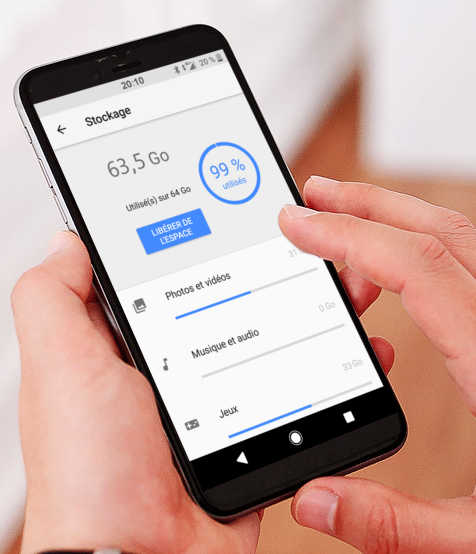)

Il souhaite remplir son smartphone de manière à avoir la meilleure liste de lecture possible à partir de sa bibliothèque, c'est à dire que la somme des notes des titres choisis doit être maximale. À quel problème problème connu cela vous fait-il penser&nbsp;?

<em>À COMPLÉTER</em>


## 3.1 Modélisation du problème
Comment pouvons nous modéliser ce problème sous la forme d'un programme linéaire&nbsp;?

<em>À COMPLÉTER</em>


<br />

Un algorithme naïf pour déterminer un résultat optimal serait une approche par force brute, qui teste toutes les solutions (admissibles ou non) et conserve la meilleure solution admissible. Dans le cas de notre étudiant, c'est une solution qui semble envisageable. Mais si l'étudiant supprime plusieurs Giga octets de jeux, et qu'il enrichit sa bibliothèque musicale, cette solution restera-t-elle viable&nbsp;? Qu'est-ce qui va devenir bloquant&nbsp;?

<em>À COMPLÉTER</em>


## 3.2 Résolution

Puisque nous avons modélisé le problème sous forme linéaire, pourquoi ne pas tester l'algorithme du Simplexe dessus&nbsp;? Reprenons les données issues du Smartphone de notre étudiant. Attention aux bornes de nos variables&nbsp;!

In [ ]:
# variables du problème
X1  = LpVariable("X_01", 0, 1)
#À COMPLÉTER


# probleme
#À COMPLÉTER

# objectif
#À COMPLÉTER

# contrainte
#À COMPLÉTER

prob.solve()
print(LpStatus[prob.status])
print("Valeur totale =", value(prob.objective))

poids_total = 0.0
poids = [40, 52, 27, 68, 80, 62, 63, 53, 56, 59]
for idx, v in enumerate(prob.variables()):
    print("X%d=%d" % (idx+1, v.varValue), end=', ')
    poids_total += v.varValue*poids[idx]
print("\npoids = %d" % poids_total)

Ça vous parait correct&nbsp;? Pourtant, cela ne l'est pas&nbsp;! Calculez à la main le poids de la solution, en reprenant les valeurs dans le tableau. Qu'obtenez-vous&nbsp;? Pourquoi&nbsp;?

<em>À COMPLÉTER</em>


Vérifions ça&nbsp;:

In [ ]:
poids_total=0.0
for idx, v in enumerate(prob.variables()):
    #À COMPLÉTER
    poids_total += v.varValue*poids[idx]
print("\npoids = %d"%poids_total)

Et là ça ne va plus du tout, La solution n'est pas admissible. On a vu qu'un arrondi inférieur produisait une solution qui, elle, est admissible. Mais avec une valeur de $X_9$ aussi proche de 1, ce n'est peut-être pas la solution optimale. Est-ce qu'un <a href="https://www.w3schools.com/python/ref_func_round.asp">arrondi au plus proche</a> marcherait mieux&nbsp;?

In [ ]:
poids_total=0.0
for idx, v in enumerate(prob.variables()):
    print("X%d=%f" % (idx+1, v.varValue), end=', ')
    poids_total += int(round(v.varValue))*poids[idx]
print("\npoids = %d" % poids_total)

Qu'observe-t-on&nbsp;?

<em>À COMPLÉTER</em>

Parmi toutes les solutions générées, nous en avons une solution qui est admissible. Est-ce une bonne méthode pour trouver une solution optimale&nbsp;? Prenons cet exemple, dans lequel l'espace des solutions admissibles délimité par les deux contraintes est en blanc. Est-ce que, pour un problème _de maximisation_, arrondir une solution optimale réelle fonctionnerait&nbsp;?

![svg image](data:image/svg+xml,%3Csvg%20width%3D%22500px%22%20version%3D%221.1%22%20viewBox%3D%220%200%20221.34%20163.14%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%3E%0A%3Cdefs%3E%0A%3CclipPath%20id%3D%22a%22%3E%0A%3Cpath%20d%3D%22m0.93606%209.3606h848.07v618.74h-848.07z%22%2F%3E%0A%3C%2FclipPath%3E%0A%3C%2Fdefs%3E%0A%3Cg%20transform%3D%22translate%2813.455%20-51.027%29%22%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273v120.61h212v-120.61z%22%20fill%3D%22%23c9c9c9%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-8.9052%2072.273h212v120.61h-212z%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m65.357%20192.76%2028.695-88.95%2039.937%2088.95z%22%20fill%3D%22%23fff%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Ctext%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-9.8662786%22%20y%3D%22197.41919%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Ctext%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20letter-spacing%3D%220px%22%20stroke-width%3D%22.26458%22%20word-spacing%3D%220px%22%20style%3D%22line-height%3A125%25%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%20x%3D%22-13.59896%22%20y%3D%22193.83653%22%20stroke-width%3D%22.26458%22%3E%3Ctspan%20dx%3D%220%22%20dy%3D%220%22%20fill%3D%22%23000000%22%20font-family%3D%22Arial%22%20font-size%3D%223.4727px%22%20font-weight%3D%22400%22%20stroke-width%3D%22.26458%22%3E0%3C%2Ftspan%3E%3C%2Ftspan%3E%3C%2Ftext%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20192.89c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20192.89c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77395-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20192.64c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%20176.05c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%20176.05c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20175.8c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20161.43c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20161.43c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20161.19c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m81.988%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.6884%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%20144.59c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.263%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m118.89%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m44.838%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.47%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.413%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.04%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.62%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.9597%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.19%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77395%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.887%20144.59c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20128c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.9597-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20127.75c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.81%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.39%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.96%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.54%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m175.11%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.69%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%20111.16c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78943%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2096.545c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2096.545c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m82.236%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m7.9361%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m100.56%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m26.511%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m119.14%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m45.086%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m137.71%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m63.661%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m156.29%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m174.86%2079.951c0-0.94423%200.78943-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m193.44%2079.951c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94422%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337z%22%20fill-rule%3D%22evenodd%22%2F%3E%0A%3Cpath%20d%3D%22m-10.639%2079.703c0-0.94423%200.78944-1.7337%201.7337-1.7337%200.95971%200%201.7337%200.78944%201.7337%201.7337%200%200.95971-0.77396%201.7337-1.7337%201.7337-0.94423%200-1.7337-0.77396-1.7337-1.7337%22%20fill%3D%22none%22%20stroke%3D%22%23000%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%22.24767px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28067%200%200%20.26458%20-20.921%2048.497%29%22%20d%3D%22m468.56%209.8287-183.53%20616.05%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3Cpath%20transform%3D%22matrix%28.28315%200%200%20.26457%20-26.54%2049.532%29%22%20d%3D%22m348.68%2017.317%20245.72%20591.12%22%20clip-path%3D%22url%28%23a%29%22%20fill%3D%22none%22%20stroke%3D%22%23f00%22%20stroke-miterlimit%3D%228%22%20stroke-width%3D%221.8721px%22%2F%3E%0A%3C%2Fg%3E%0A%3C%2Fsvg%3E)

<em>À COMPLÉTER</em>

C'est finalement assez logique, puisque le problème de décision est $\mathcal{NP}$-Complet ([on le sait depuis 1972](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)). Le nombre exponentiel de solution, qu'on a démontré tout à l'heure, était-il un indice&nbsp;?

<em>À COMPLÉTER</em>


# 4 Conclusion

Ce Workshop est maintenant fini, vous avez utilisé la programmation linéaire, vous en avez découvert les principes mathématiques de base, le fonctionnement général, et vous en avez testé les limites.


Et si vous êtes déçus de ne pas être venus à bout du problème du sac à dos, rassurez-vous, on ne s'avoue pas vaincus, dès la semaine prochaine, on s'y attaque à nouveau. Et cette fois-ci, avec beaucoup plus de succès&nbsp;!